# Homework_2022_03_03

<font color=ff0000> 截止日期 3.20 中午 11:59</font>

首先请你创建矩阵$A, B, C, D$，它们都是服从标准正态分布的矩阵，其中$A$的大小为$20\times 40$，$B$的大小为$40\times 40$，$C$的大小为$40\times 1$, $D$的大小为$40 \times 1$.

In [10]:
import numpy as np
np.random.seed(1)
# TODO
A = np.random.standard_normal(size=(20, 40))
B = np.random.standard_normal(size=(40, 40))
C = np.random.standard_normal(size=(40, 1))
D = np.random.standard_normal(size=(40, 1))
# 不用print

### Q1.1（1分） 计算$R=A+A$, $R=A^TA$, $R=AB$, $R=B-I$。

In [11]:
# TODO
R1 = A+A
R2 = np.dot(A.T, A)
R3 = np.dot(A, B)
R4 = B - np.eye(40)
# 不用print

### Q1.2（1分）计算方程组的解。

$$
\left\{\begin{aligned}
2 x_{1}+x_{2}+x_{3} &=5 \\
3 x_{1}+2 x_{2}+ 2 x_{3} &=8 \\
x_{2}+2 x_{3} &=2
\end{aligned}\right.
$$

In [12]:
# TODO
M = np.array([[2, 1, 1],[3, 2, 2],[0, 1, 2]])
Y = np.array([[5], [8], [2]])
X = np.round(np.linalg.solve(M, Y), 2)
print(X)

[[ 2.]
 [-0.]
 [ 1.]]


### Q1.3（2分）求解矩阵的特征值以及对应的特征向量。输出最大最小特征值以及对应的特征向量。并画出求出的特征向量。
使用np.linalg.eig。

In [13]:
R = np.array([[2,0],[0,3]])
# TODO
eigenvalues, eigenvectors = np.linalg.eig(R)
maxvalue = max(eigenvalues)
minvalue = min(eigenvalues)
for i in range(len(eigenvalues)):
    if eigenvalues[i] == maxvalue:
        print(eigenvalues[i], eigenvectors[:,i])
for i in range(len(eigenvalues)):
    if eigenvalues[i] == minvalue:
        print(eigenvalues[i], eigenvectors[:,i])

3.0 [0. 1.]
2.0 [1. 0.]


### 画出求出的特征向量。要求用quiver绘制箭头。

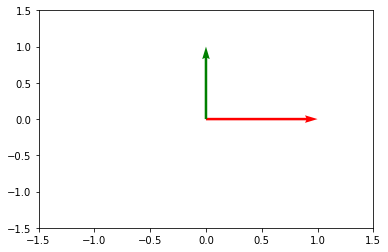

In [14]:
import matplotlib.pyplot as plt
# TODO
plt.quiver([0, 0], [0, 0], [eigenvectors[0,0], eigenvectors[0,1]],
        [eigenvectors[1,0], eigenvectors[1,1]], color=['red', 'green'],
        angles='xy', scale_units='xy', scale=1)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

### Q1.4（1分）给定两个矩阵，求Pearson相关系数。
Pearson相关系数，是用来判断两个变量线性相关程度的一个统计指标。
$cov(x,y)$表示$x$和$y$的协方差。$\sigma_x$和$\sigma_y$分别是$x$和$y$的标准差。

$$corr_{x,y}=\frac{cov(x,y)}{\sigma_x*\sigma_y}$$

要求用np.cov按照公式计算。

In [15]:
np.random.seed(1)

xy = np.random.randn(2, 10)
# TODO
x = xy[0,:]
y = xy[1,:]
x_cov = np.sqrt(np.var(x))
y_cov = np.sqrt(np.var(y))
xy_cov = np.cov(np.array([x,y]))
corr = xy_cov/(x_cov*y_cov)
corr

array([[1.32435978, 0.72846413],
       [0.72846413, 0.93219979]])

### Q1.5（1分）哈达玛矩阵。

哈达玛矩阵是由+1和-1元素构成的方阵，并且遵循：

$$H_{n}\otimes H_{n}^{T}=nI$$


$$H_1 = \frac{1}{\sqrt{2}}[\begin{matrix} 
1 &1\\ 
1 &-1 \\ \end{matrix}]$$

$$H_n = H_1 \otimes H_{n-1} = \frac{1}{\sqrt{2}}
[\begin{matrix} 
H_{n-1} &H_{n-1}\\ 
H_{n-1} &-H_{n-1} \\ \end{matrix}]
$$

哈达玛矩阵的阶数都是2的倍数。实现一个函数，可以输出$2^k$阶的哈达玛矩阵。
用np.hstack构建此矩阵，可以不必带上系数。

In [16]:
def hada(k):
    # TODO
    H = np.array([[1, 1], [1, -1]])
    for i in range(2, k+1):
        H = np.hstack((np.vstack((H, H)),np.vstack((H, -H))))
    return H
    
h8 = hada(3)
print(h8 @ h8.T)

[[8 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0]
 [0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 8]]


### Q1.6（选做）（1分）将矩阵$a$转换成蛇形数组。请不要引入新的变量，所有变化操作都在$a$上进行。

In [17]:
a = np.arange(9).reshape(3, 3)
# TODO
a[[1, 1, 2], [0, 2, 1]] = a[[2, 1, 1], [1, 0, 2]]
a[[1, 2], [1, 2]] = a[[2, 1], [2, 1]]
print(a)

[[0 1 2]
 [7 8 3]
 [6 5 4]]


### Q2.1（2分）实现课上讲的PCA降维，并要求取最大的两个特征值来恢复矩阵。

In [18]:
np.random.seed(1)

x = 7*np.random.rand(100)
y = 0.5*x + 1 + 3*np.random.rand(100)

X = np.hstack([x.reshape(100, 1), x.reshape(100, 1), y.reshape(100, 1), x.reshape(100, 1)])

def centerData(X):
    X = X.copy()
    X -= np.mean(X, axis=0)
    return X

X = centerData(X)
print(X[7][2])
# TODO
C = np.dot(X.T, X)/4
eigenvalues1, eigenvectors1 = np.linalg.eig(C)
vectors = eigenvectors1[:,:2]
reconstruct_X = np.dot(X, np.dot(vectors, vectors.T))
# END TODO
print(reconstruct_X[7][2])

0.8426843495317922
0.842684349531792


### Q2.2（2分）用SVD奇异值分解来压缩矩阵。

SVD将原始的矩阵$Data$分解成三个矩阵$U$,$\Sigma$,和$V^T$，如果原始矩阵$Data$是$m$行$n$列，那么$U$,$\Sigma$,和$V^T$就分别是$m$行$m$列、$m$行$n$列和$n$行$n$列。

为了清晰起见，上述过程可以写成如下一行：$$Data_{m\times n}=U_{m\times m}\Sigma_{m \times n}V^T_{n\times n}$$

上述分解中会构建出一个矩阵$\Sigma$，该矩阵只有对角元素，其他元素均为0. 另一个惯例就是，$\Sigma$的对角元素是从大到小排列的。这些对角元素称为奇异值（Singular Value），它们就是矩阵$Data Data^{T}$特征值的平方根。

在科学工程中，一直存在这样一个普遍事实：在某个奇异值的数目（$r$个）之后，其他的奇异值都置为0.这就意味着数据集中仅有$r$个重要特征，而其余特征则都是噪声或冗余特征。

本题要求用如下结果来近似原矩阵
$$Data_{m\times n}\approx U_{m\times 3}\Sigma_{3 \times 3}V^T_{3\times n}$$

对矩阵$A$进行SVD分解，使用np.linalg.svd。

In [19]:
# TODO
u, s, vh = np.linalg.svd(A, compute_uv=True)
zeros = np.zeros((A.shape[0], A.shape[1]-s.shape[0]))
s_svd = np.hstack((np.diag(s), zeros))
A_svd = np.dot(np.dot(u[:,:3], s_svd[:3,:3]), vh[:3,:])
# 不用print